In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def crank_nicolson_method(t, x, r_0, r_L, T_0, ):
	dx = x[1] - x[0]
	dt = t[1] - t[0]
	u = np.zeros((t.size, x.size))
	u[0, :] = T_0(x)
	Ai = - dt / (2 * dx ** 2)
	Bi = 1 + dt / dx ** 2
	Ci = Ai
	alpha = np.zeros(x.size - 1)
	beta = np.zeros_like(alpha)
	for time_step in range(t.size - 1):
		alpha[0] = 0
		beta[0] = r_0(t[time_step + 1])
		for space_step in range(1, x.size - 1):
			f = u[time_step, space_step] + (dt / (2 * dx ** 2)) * (u[time_step, space_step + 1] - 2 * u[time_step, space_step] + u[time_step, space_step - 1])
			alpha[space_step] = -Ci / (Bi + Ai * alpha[space_step - 1])
			beta[space_step] = (f - Ai * beta[space_step - 1]) / (Bi + Ai * alpha[space_step - 1])
		u[time_step + 1, x.size - 1] = r_L(t[time_step + 1])
		for space_step in range(x.size - 2, -1, -1):
			u[time_step + 1, space_step] = alpha[space_step] * u[time_step + 1, space_step + 1] + beta[space_step]
	return u

In [3]:
N = 100
M = 100
T = 1
L = 1
t = np.linspace(0, T, M)
x = np.linspace(0, L, N)
r_0 = lambda t: 0
r_L = lambda t: 0
T_0 = lambda x: x * ((1 - x / L) ** 2)

In [4]:
solution = crank_nicolson_method(t, x, r_0, r_L, T_0)

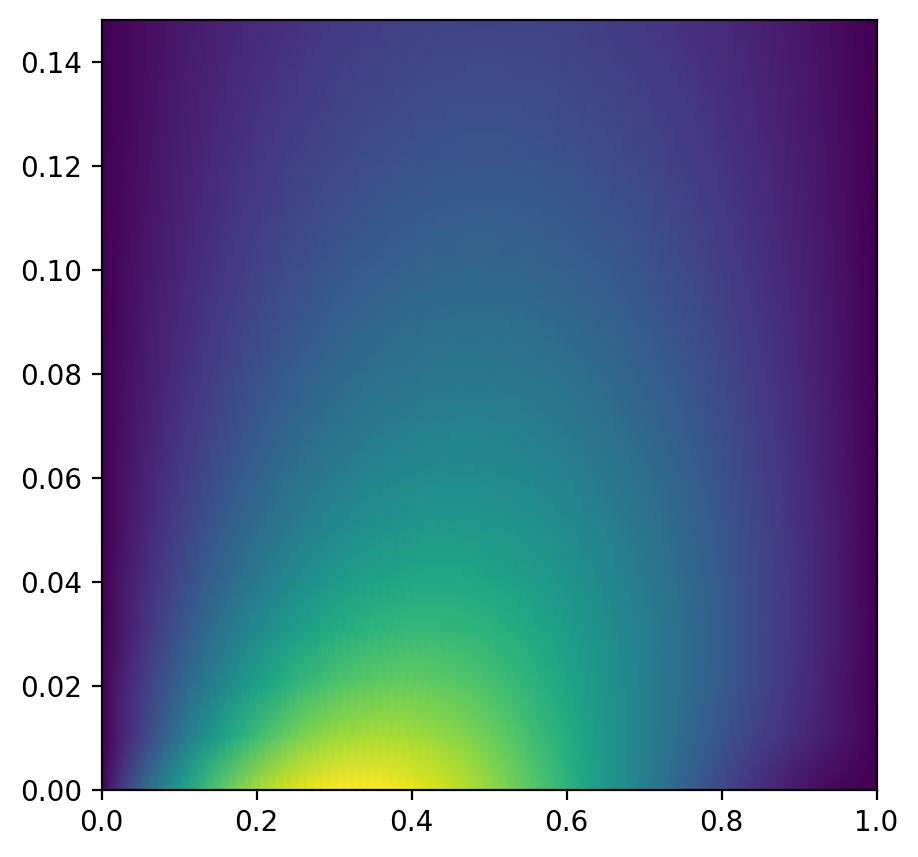

Text(0, 0.5, 'Temperature')

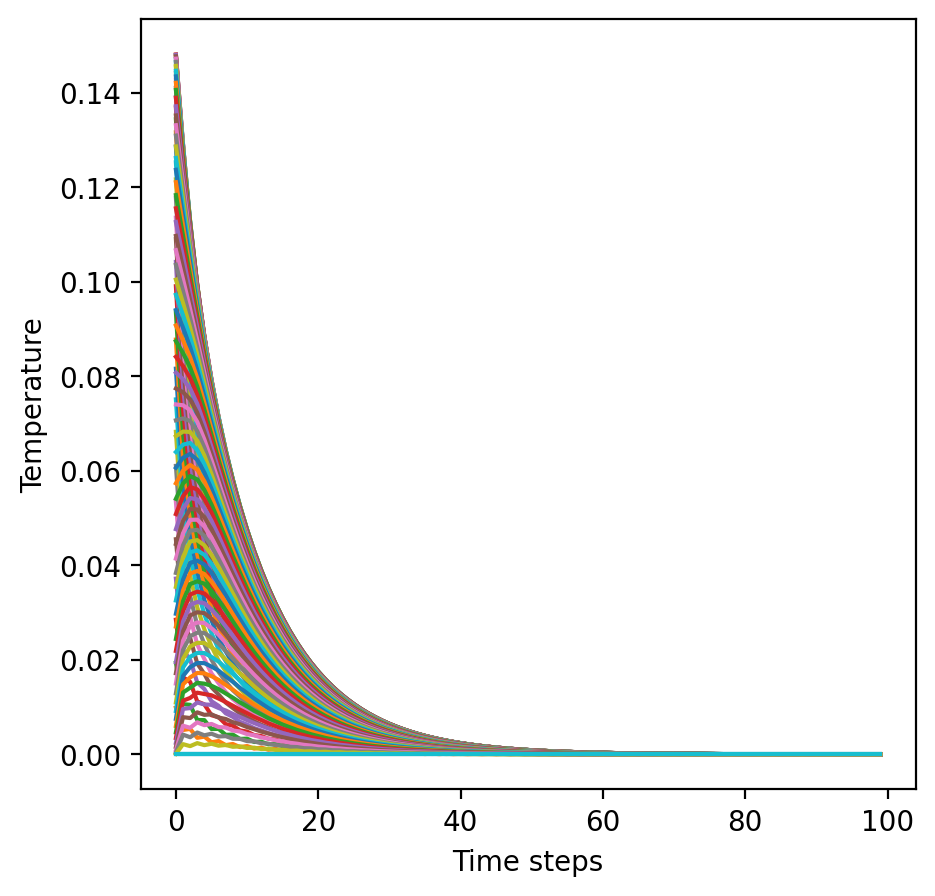

In [5]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 200
plt.pcolormesh(x, t, solution, shading='gouraud')
plt.xlim(0, L)
plt.ylim(0, np.max(solution))
plt.show()

fig, ax = plt.subplots()
ax.plot(solution)
plt.xlabel('Time steps')
plt.ylabel('Temperature')
plt.show()